<a href="https://colab.research.google.com/github/yb-whilelearning/PythonProjects__ML/blob/main/GradientDescent_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

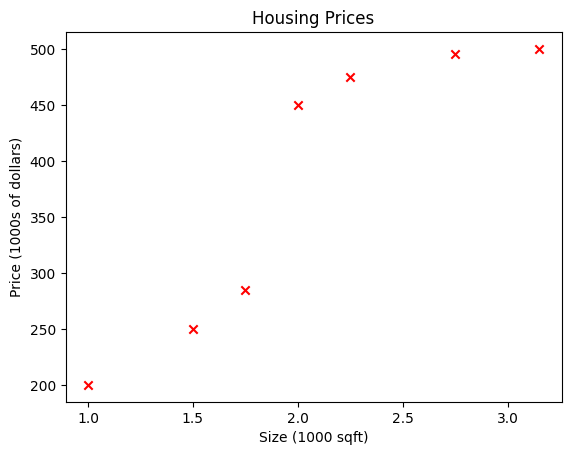

In [2]:
x_train = np.array([1.0, 2.0, 1.5, 1.75, 2.25, 2.75,3.15])
y_train = np.array([200.0, 450.0, 250.0, 285.0, 475.0, 496.0, 500.2])

plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (1000s of dollars)")
plt.show()

In [3]:
def compute_cost(x,y,w,b):
  m=len(x)
  f_wb = np.zeros(m)
  cost = 0

  for i in range (m):
      f_wb = w * x[i] + b
      cost = cost + (f_wb -y[i])**2

  total_cost= (1 / (2 * m)) * cost
  return total_cost




In [4]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b                         # always have your model here first
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

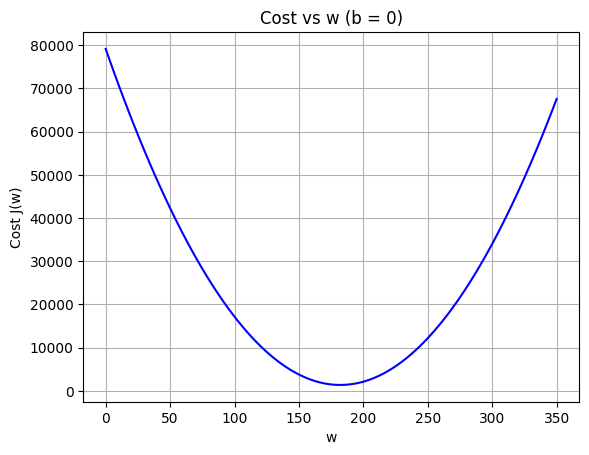

In [5]:
# Example usage:
w_vals = np.linspace(0, 350, 100)
cost_vals = []
b = 0  # or any b you like

for w in w_vals:
    cost = compute_cost(x_train, y_train, w, b)
    cost_vals.append(cost)

plt.plot(w_vals, cost_vals, 'b-')
plt.xlabel('w')
plt.ylabel('Cost J(w)')
plt.title(f'Cost vs w (b = {b})')
plt.grid(True)
plt.show()

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

This condition ensures that the print statement executes roughly 10 times throughout the
entire gradient descent process, or at every iteration if num_iters is less than 10.
This prevents the output from being too verbose for a large number of iterations while still
giving you periodic updates.

 Iteration {i:4}: It prints the current iteration number (i), formatted to take up at least 4 characters.
 Cost {J_history[-1]:0.2e}It prints the most recent cost value from the J_history list (J_history[-1]).
 The :0.2e formats the cost in scientific notation with two decimal places.

In [7]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.06e+04  dj_dw: -8.546e+02, dj_db: -3.795e+02   w:  8.546e+00, b: 3.79457e+00
Iteration 1000: Cost 1.24e+03  dj_dw: -2.831e-01, dj_db:  6.346e-01   w:  1.566e+02, b: 5.80066e+01
Iteration 2000: Cost 1.23e+03  dj_dw: -1.241e-01, dj_db:  2.783e-01   w:  1.585e+02, b: 5.36859e+01
Iteration 3000: Cost 1.23e+03  dj_dw: -5.443e-02, dj_db:  1.220e-01   w:  1.593e+02, b: 5.17912e+01
Iteration 4000: Cost 1.23e+03  dj_dw: -2.387e-02, dj_db:  5.351e-02   w:  1.597e+02, b: 5.09604e+01
Iteration 5000: Cost 1.23e+03  dj_dw: -1.047e-02, dj_db:  2.346e-02   w:  1.599e+02, b: 5.05961e+01
Iteration 6000: Cost 1.23e+03  dj_dw: -4.590e-03, dj_db:  1.029e-02   w:  1.599e+02, b: 5.04363e+01
Iteration 7000: Cost 1.23e+03  dj_dw: -2.013e-03, dj_db:  4.512e-03   w:  1.600e+02, b: 5.03663e+01
Iteration 8000: Cost 1.23e+03  dj_dw: -8.825e-04, dj_db:  1.978e-03   w:  1.600e+02, b: 5.03356e+01
Iteration 9000: Cost 1.23e+03  dj_dw: -3.870e-04, dj_db:  8.675e-04   w:  1.600e+02, b: 5.03221e+01


A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

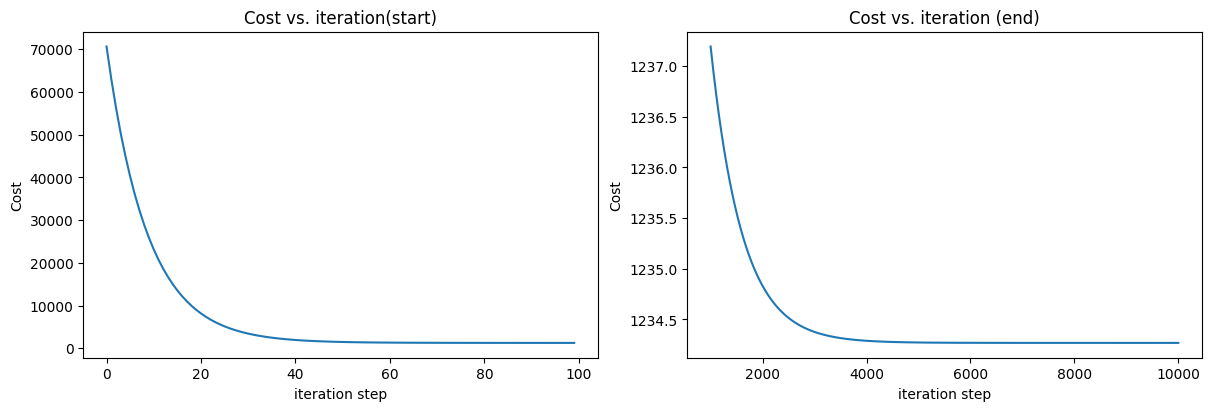

In [8]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()